In [1]:
import geopandas as gpd
import pandas as pd
import copy as cp
import matplotlib.pyplot as plt

In [2]:
#url de exportacion
url="../datasets_resultantes/interbase_2001/tablas_csv/"

#url del dataset
url_dataset="../datasets_resultantes/interbase_2001/tablas_csv/"


#cargar los datos de extraidos datos del 2000
df_datos = pd.read_csv(url_dataset+'tbl_DATOS_2001.csv', sep='|',lineterminator=";",encoding='utf8')


In [3]:
#completar campos

#completacion de datos
df_datos[df_datos.columns[11]]=df_datos[df_datos.columns[11]].apply(lambda x: "0"+str(x) if len(str(x))<4 else str(x) ).astype(str)
df_datos[df_datos.columns[12]]=df_datos[df_datos.columns[12]].apply(lambda x: "0"+str(x) if len(str(x))<4 else str(x) ).astype(str)
del df_datos[df_datos.columns[0]]


In [4]:
#conversion de serie a dataframe
def serieDataFrame(seriepd:pd.Series):
    df_temporal=pd.DataFrame(data=seriepd ,columns=[seriepd.name,seriepd.name+"_0"])
    df_temporal[df_temporal.columns[1]]=seriepd.keys()
    df_temporal["temporal"]=df_temporal[df_temporal.columns[0]]
    df_temporal[df_temporal.columns[0]]=df_temporal[df_temporal.columns[1]]
    df_temporal[df_temporal.columns[1]]=df_temporal[df_temporal.columns[2]]
    del df_temporal[df_temporal.columns[2]]
    df_temporal.reset_index(drop=True,inplace=True)
    return df_temporal

In [5]:
#calculo de frecuencia de los datos
df_fecuencias=serieDataFrame(df_datos[df_datos.columns[0]].value_counts())
for x in range(1,len(df_datos.columns),1):
    df_fecuencias = pd.concat([df_fecuencias, serieDataFrame(df_datos[df_datos.columns[x]].value_counts())], ignore_index = True)


In [6]:
# exportar las tablas a un csv utilizando una funcion 
# recibe el nombre que recibira el archivo, el dataframe o cuerpo de la tabla y la ubicacion dende se creara el archivo
def exportaTabla(nombre_tabla:str,tabla:pd.DataFrame,url:str):
    tabla.to_csv(url+'tbl_'+nombre_tabla+'.csv', sep='|',lineterminator=";",quotechar='"',doublequote=True, index=False)

In [8]:
#guardar calculo de frecuencias
exportaTabla("DATOS_2001_frecuencias",df_fecuencias,url)

In [7]:

# preparar las variables de frecuencia de nombres
nombre1=df_fecuencias[[df_fecuencias.columns[0],df_fecuencias.columns[1]]].copy()
nombre2=df_fecuencias[[df_fecuencias.columns[2],df_fecuencias.columns[3]]].copy()

nombre1=nombre1.dropna()
nombre2=nombre2.dropna()
nombre2.sort_values(by=[nombre2.columns[0]], inplace=True)
nombre2.reset_index(drop=True,inplace=True)
nombre1.sort_values(by=[nombre1.columns[1]], inplace=True)
nombre1.reset_index(drop=True,inplace=True)
nombre2.rename(columns={nombre2.columns[0]:nombre1.columns[0]},inplace=True)

nombre1=nombre1.merge(nombre2,how='outer', on=nombre1.columns[0])
nombre1=nombre1.fillna(0)

nombre1[nombre1.columns[0]+"_3"]=nombre1[nombre1.columns[1]]+nombre1[nombre1.columns[2]]


In [8]:
# perar la variables de frecuencia de apellido
nombre3=df_fecuencias[[df_fecuencias.columns[4],df_fecuencias.columns[5]]].copy()
nombre4=df_fecuencias[[df_fecuencias.columns[6],df_fecuencias.columns[7]]].copy()

nombre3=nombre3.dropna()
nombre4=nombre4.dropna()
nombre3.sort_values(by=[nombre3.columns[0]], inplace=True)
nombre3.reset_index(drop=True,inplace=True)
nombre4.sort_values(by=[nombre4.columns[1]], inplace=True)
nombre4.reset_index(drop=True,inplace=True)
nombre4.rename(columns={nombre4.columns[0]:nombre3.columns[0]},inplace=True)

nombre3=nombre3.merge(nombre4,how='outer', on=nombre3.columns[0])
nombre3=nombre3.fillna(0)
nombre3[nombre3.columns[0]+"_3"]=nombre3[nombre3.columns[1]]+nombre3[nombre3.columns[2]]


In [110]:
#exportar las frecuencias de los nombres y apellidos
exportaTabla("DATOS_2001_frecuencias_n",nombre1,url)
exportaTabla("DATOS_2001_frecuencias_a",nombre3,url)

In [9]:
#fecuencias de la densidad poblacional
dir1=df_fecuencias[[df_fecuencias.columns[20],df_fecuencias.columns[21]]].copy()
dir2=df_fecuencias[[df_fecuencias.columns[22],df_fecuencias.columns[23]]].copy()
dir3=df_fecuencias[[df_fecuencias.columns[16],df_fecuencias.columns[17]]].copy()

dir1=dir1.dropna()
dir2=dir2.dropna()
dir3=dir3.dropna()
dir1.sort_values(by=[dir1.columns[0]], inplace=True)
dir1.reset_index(drop=True,inplace=True)
dir2.sort_values(by=[dir2.columns[0]], inplace=True)
dir2.reset_index(drop=True,inplace=True)
dir3.sort_values(by=[dir3.columns[0]], inplace=True)
dir3.reset_index(drop=True,inplace=True)

dir3[dir3.columns[0]]=dir3[dir3.columns[0]].astype(int)



In [10]:
#cargar mapas de departamento y municipio

url_mapa_deptal="../datasets_fuentes/Limite_Departamental_de_Honduras.shp" 
map_departamentos_df = gpd.read_file(url_mapa_deptal) 

url_mapa_municip="../datasets_fuentes/Limite_Municipal_HN.shp"
map_municipios_df = gpd.read_file(url_mapa_municip) 


In [11]:
#aplicar separador de miles cada 3 caracteres
def formatoMiles(cadena_numeros:str):
    cadena_temporal=""
    c=0
    for x in range(len(cadena_numeros)-1,-1,-1):
        c+=1
        cadena_temporal=cadena_numeros[x]+cadena_temporal
        if c%3==0 and (c!=len(cadena_numeros)):
            cadena_temporal=","+cadena_temporal
    return cadena_temporal
formatoMiles("1234567890125231")

'1,234,567,890,125,231'

C:\Users\Netero\AppData\Local\Temp\ipykernel_6104\1734113220.py:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


<Axes: title={'center': 'Poblacion Por Departamento'}>

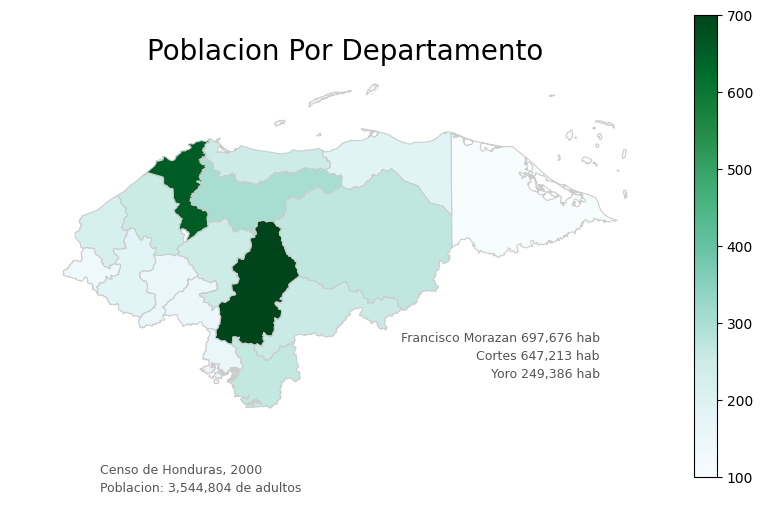

In [12]:
#configurarcion de mapa poblacional de departamentos
#combinar y ordenar datos
map_departamentos_datos=map_departamentos_df.set_index(map_departamentos_df.columns[3]).join(dir3.set_index(dir3.columns[0]))
top_departamentos=(map_departamentos_datos.sort_values(by=[map_departamentos_datos.columns[9]], inplace=False,ascending=False)).head(5)

# set a la variable a visualizar en el mapa
variable_d = map_departamentos_datos.columns[9]
# set el rango de choropleth
vmin, vmax = 100, 700
# crear la figura con Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# remover ejes
ax.axis('off')

#  titulo
ax.set_title("Poblacion Por Departamento", fontdict={"fontsize": "20", "fontweight" : "3"})
# leyenda o annotacon para la fuente
ax.annotate('Censo de Honduras, 2000',xy=(0.1, 0.1), xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize=9, color="#555555")
ax.annotate("Poblacion: "+formatoMiles(str(int(map_departamentos_datos[map_departamentos_datos.columns[9]].sum())))+" de adultos",xy=(0.1, 0.07), xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize=9, color="#555555")
ax.annotate(top_departamentos.iloc[0,2]+" "+formatoMiles(str(int(top_departamentos.iloc[0,9])))+" hab",xy=(0.6, 0.32), xycoords="figure fraction", horizontalalignment="right", verticalalignment="top", fontsize=9, color="#555555")
ax.annotate(top_departamentos.iloc[1,2]+" "+formatoMiles(str(int(top_departamentos.iloc[1,9])))+" hab",xy=(0.6, 0.29), xycoords="figure fraction", horizontalalignment="right", verticalalignment="top", fontsize=9, color="#555555")
ax.annotate(top_departamentos.iloc[2,2]+" "+formatoMiles(str(int(top_departamentos.iloc[2,9])))+" hab",xy=(0.6, 0.26), xycoords="figure fraction", horizontalalignment="right", verticalalignment="top", fontsize=9, color="#555555")

# leyeda de barra de colores
sm = plt.cm.ScalarMappable(cmap="BuGn", norm=plt.Normalize(vmin=vmin, vmax=vmax))
# dejar en blanco los rangos
sm._A = []
# agregar la barara al mapa
cbar = fig.colorbar(sm)

#mostrar mapa departamentos
map_departamentos_datos.plot(column=variable_d, cmap="BuGn", linewidth=0.8, ax=ax, edgecolor="0.8")


C:\Users\Netero\AppData\Local\Temp\ipykernel_6104\4007265591.py:31: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


<Axes: title={'center': 'Poblacion Por Municipio'}>

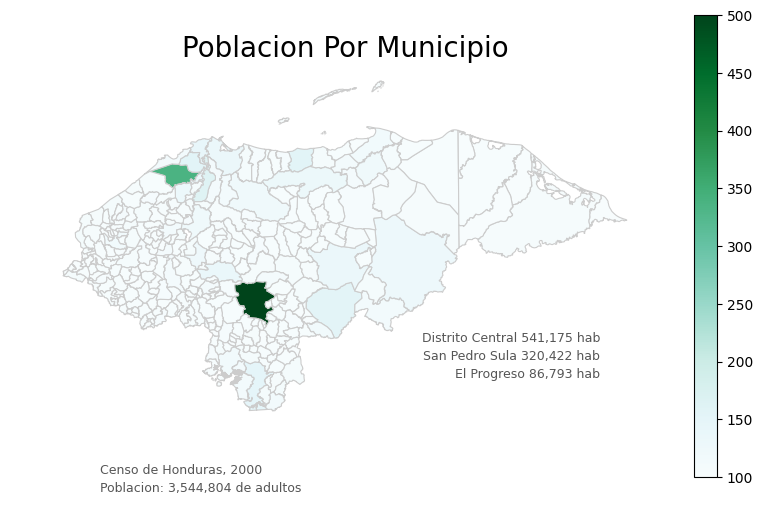

In [13]:
#configurarcion de mapa poblacional de municipios

#combinar y ordenar datos
map_municipios_datos=map_municipios_df.set_index(map_municipios_df.columns[3]).join(dir1.set_index(dir1.columns[0]))
top_municipio=(map_municipios_datos.sort_values(by=[map_municipios_datos.columns[11]], inplace=False,ascending=False)).head(5)

# set a la variable a visualizar en el mapa
variable_d = map_municipios_datos.columns[11]
# set el rango de choropleth
vmin, vmax = 100, 500
# crear la figura con Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# remover ejes
ax.axis('off')

#  titulo
ax.set_title("Poblacion Por Municipio", fontdict={"fontsize": "20", "fontweight" : "3"})
# leyenda o annotacon para la fuente
ax.annotate('Censo de Honduras, 2000',xy=(0.1, 0.1), xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize=9, color="#555555")
ax.annotate("Poblacion: "+formatoMiles(str(int(map_municipios_datos[map_municipios_datos.columns[11]].sum())))+" de adultos",xy=(0.1, 0.07), xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize=9, color="#555555")
ax.annotate(top_municipio.iloc[0,2]+" "+formatoMiles(str(int(top_municipio.iloc[0,11])))+" hab",xy=(0.6, 0.32), xycoords="figure fraction", horizontalalignment="right", verticalalignment="top", fontsize=9, color="#555555")
ax.annotate(top_municipio.iloc[1,2]+" "+formatoMiles(str(int(top_municipio.iloc[1,11])))+" hab",xy=(0.6, 0.29), xycoords="figure fraction", horizontalalignment="right", verticalalignment="top", fontsize=9, color="#555555")
ax.annotate(top_municipio.iloc[2,2]+" "+formatoMiles(str(int(top_municipio.iloc[2,11])))+" hab",xy=(0.6, 0.26), xycoords="figure fraction", horizontalalignment="right", verticalalignment="top", fontsize=9, color="#555555")

# leyeda de barra de colores
sm = plt.cm.ScalarMappable(cmap="BuGn", norm=plt.Normalize(vmin=vmin, vmax=vmax))
# dejar en blanco los rangos
sm._A = []
# agregar la barara al mapa
cbar = fig.colorbar(sm)

#mostrar el mapa poblacional por municipios
map_municipios_datos.plot(column=variable_d, cmap="BuGn", linewidth=0.8, ax=ax, edgecolor="0.8")


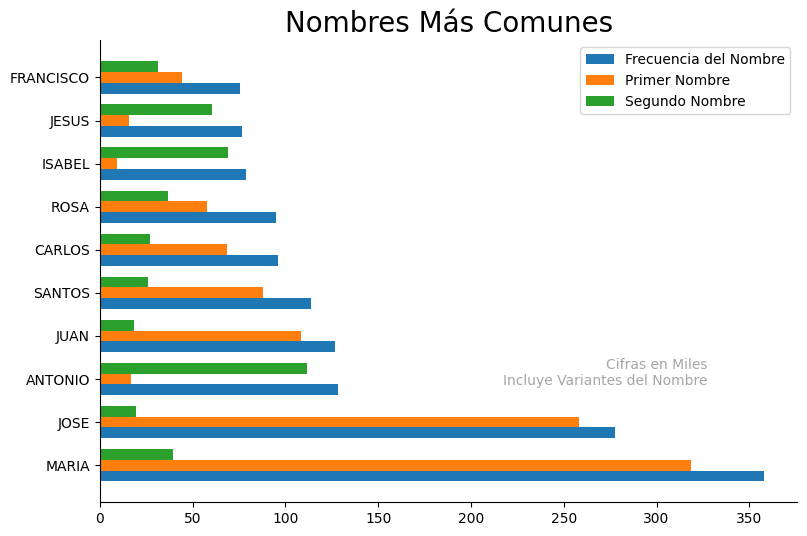

In [17]:
# graficos de barra para los nombres mas comunes
#recuperar datos de los 10 nombres mas frecuentes
bar_nombre=(nombre1.sort_values(by=[nombre1.columns[3]], inplace=False,ascending=False)).head(10)

posicion=pd.array([0,1,2,3,4,5,6,7,8,9], dtype=float)

#configuracion de barras,  y tamaño
fig, ax=plt.subplots(figsize=(9, 6))

plt.barh(posicion - 0.25, bar_nombre[bar_nombre.columns[3]].head(10).values/1000, height=0.25, label='Frecuencia del Nombre')
plt.barh(posicion, bar_nombre[bar_nombre.columns[1]].head(10).values/1000, height=0.25, label='Primer Nombre')
plt.barh(posicion + 0.25, bar_nombre[bar_nombre.columns[2]].head(10).values/1000, height=0.25, label='Segundo Nombre')

#configuracion de etiquetas
fig.text(0.8, 0.3, 'Cifras en Miles\nIncluye Variantes del Nombre', fontsize=10, color='grey', ha='right', va='bottom',  alpha=0.7)
plt.yticks(posicion, bar_nombre[bar_nombre.columns[0]].head(10).values)
plt.legend(loc='best')
plt.title("Nombres Más Comunes", loc="center", fontdict={"fontsize": "20", "fontweight" : "3"})
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()


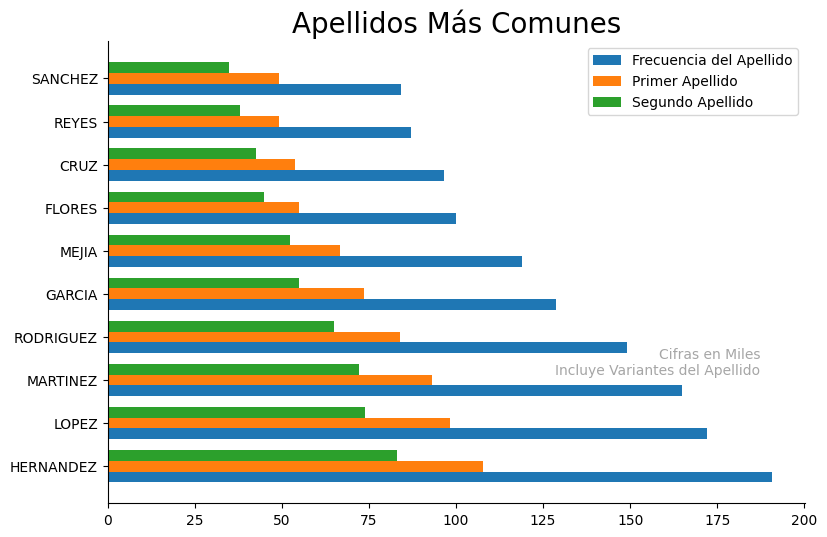

In [18]:
# graficos de barra para los apellidos  mas comunes
#recuperacion de los 10 apellidos mas comunes
bar_apellido=(nombre3.sort_values(by=[nombre3.columns[3]], inplace=False,ascending=False)).head(10)

posicion=pd.array([0,1,2,3,4,5,6,7,8,9], dtype=float)

#configuracion de barras y tamaño del grafico
fig, ax=plt.subplots(figsize=(9, 6))
plt.barh(posicion - 0.25, bar_apellido[bar_apellido.columns[3]].head(10).values/1000, height=0.25, label='Frecuencia del Apellido')
plt.barh(posicion, bar_apellido[bar_apellido.columns[1]].head(10).values/1000, height=0.25, label='Primer Apellido')
plt.barh(posicion + 0.25, bar_apellido[bar_apellido.columns[2]].head(10).values/1000, height=0.25, label='Segundo Apellido')

#configuracion de etiquetas 
fig.text(0.85, 0.32, 'Cifras en Miles\nIncluye Variantes del Apellido', fontsize=10, color='grey', ha='right', va='bottom',  alpha=0.7)
plt.yticks(posicion, bar_apellido[bar_apellido.columns[0]].head(10).values)
plt.legend(loc='best')
plt.title("Apellidos Más Comunes", loc="center", fontdict={"fontsize": "20", "fontweight" : "3"})
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()


Text(0.5, 1.0, 'Proporcion Poblacional Segun el Sexo')

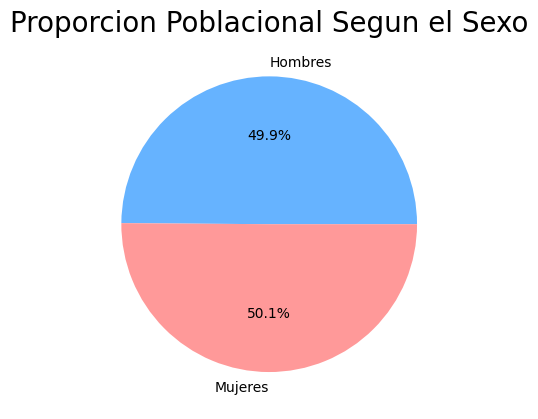

In [19]:
# configuracion del graficos de pastel para la porporcion de la poblacion segun el sexo
plt.pie([df_fecuencias[(df_fecuencias[df_fecuencias.columns[8]]==1)].iloc[0,9],df_fecuencias[(df_fecuencias[df_fecuencias.columns[8]]==2)].iloc[0,9]],labels=["Hombres","Mujeres"], colors=['#66b3ff','#ff9999'],autopct="%.1f%%")
plt.title("Proporcion Poblacional Segun el Sexo", loc="center", fontdict={"fontsize": "20", "fontweight" : "3"})
#df_fecuencias[(df_fecuencias[df_fecuencias.columns[8]]==1)].iloc[0,9]

In [21]:
#crea una serie con los rangos de edad y los devuelve por sexo segun el parametro izq_der
def rangoEdad(_edad:pd.DataFrame,_sexo:int=0):
    df_temp=[]
    serie_temporal_i=[]
    serie_temporal_d=[]
    rango_min=20
    rango_max=25
    for x in range(0,12,1):
        if x==0:
           df_temp.append((_edad[(_edad[_edad.columns[0]]==1)&(_edad[_edad.columns[2]]<rango_min+1)]).count()[0])
           serie_temporal_i.append(df_temp[len(df_temp)-1])
           df_temp.append((_edad[(_edad[_edad.columns[0]]==2)&(_edad[_edad.columns[2]]<rango_min+1)]).count()[0])
           serie_temporal_d.append(df_temp[len(df_temp)-1])
        else:
            if x!=11:
                df_temp.append((_edad[(_edad[_edad.columns[0]]==1)&(_edad[_edad.columns[2]]>rango_min)&(_edad[_edad.columns[2]]<rango_max+1)]).count()[0])
                serie_temporal_i.append(df_temp[len(df_temp)-1])
                df_temp.append((_edad[(_edad[_edad.columns[0]]==2)&(_edad[_edad.columns[2]]>rango_min)&(_edad[_edad.columns[2]]<rango_max+1)]).count()[0])
                serie_temporal_d.append(df_temp[len(df_temp)-1])
            else:
                df_temp.append((_edad[(_edad[_edad.columns[0]]==1)&(_edad[_edad.columns[2]]>rango_max)]).count()[0])
                serie_temporal_i.append(df_temp[len(df_temp)-1])
                df_temp.append((_edad[(_edad[_edad.columns[0]]==2)&(_edad[_edad.columns[2]]>rango_max)]).count()[0])
                serie_temporal_d.append(df_temp[len(df_temp)-1])
            rango_max+=5
            rango_min+=5
    if _sexo==1:
        df_temp=serie_temporal_i
    if _sexo==2:
        df_temp=serie_temporal_d
    return pd.array(df_temp)


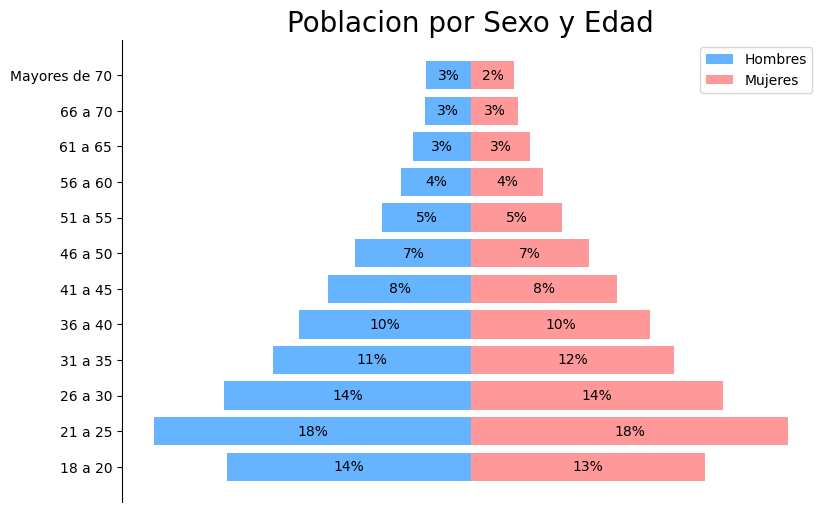

In [22]:
# Configuracion grafico de distribucion de edades y sexo

#preparacion de los rangos de edad
df_edad=df_datos[[df_datos.columns[4],df_datos.columns[5]]].copy()
df_edad[df_edad.columns[1]+"_e"]=2000-df_edad[df_edad.columns[1]].copy()
df_edad.sort_values(by=df_edad.columns[1],inplace=True)
df_edad=df_edad[(df_edad[df_edad.columns[0]]!=0)]

#obtener datos de los rangos de edad
# definir barras izquierda y derecha
datos_izquierda=rangoEdad(df_edad,1)
datos_derecha=rangoEdad(df_edad,2)
posicion=range(len(datos_izquierda))

#configurar barras
fig, ax=plt.subplots(figsize=(9, 6))
ax.barh(posicion, -datos_izquierda, align='center', color='#66b3ff', label='Hombres')
ax.barh(posicion, datos_derecha, align='center', color='#ff9999', label='Mujeres')

# Agregar etiquetas con los porcentajes
for i, v in enumerate(datos_izquierda):
    ax.text(-v/2, i, f'{v/sum(datos_izquierda):.0%}', ha='center', va='center', color='black', fontsize=10)
for i, v in enumerate(datos_derecha):
    ax.text(v/2, i, f'{v/sum(datos_derecha):.0%}', ha='center', va='center', color='black', fontsize=10)

#configurar etiquetas
plt.yticks(posicion, ["18 a 20","21 a 25","26 a 30","31 a 35","36 a 40","41 a 45","46 a 50","51 a 55","56 a 60","61 a 65","66 a 70","Mayores de 70"])
plt.legend(loc='best')
plt.title("Poblacion por Sexo y Edad", loc="center", fontdict={"fontsize": "20", "fontweight" : "3"})
plt.xticks(())
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.show()
